In [1]:
import os
import pandas as pd
import numpy as np

In [163]:
baseDir = r'.\Data'

In [164]:
li = []
for fileName in os.listdir(baseDir):
    currentFilePath = os.path.join(baseDir, fileName)
    df1 = pd.read_csv(currentFilePath, header=None)
    df1[0] = fileName
    li.append(df1)

In [165]:
df = pd.concat(li)
df[0].unique()

array(['1.csv', '10.csv', '11.csv', '12.csv', '13.csv', '14.csv',
       '15.csv', '2.csv', '3.csv', '4.csv', '5.csv', '6.csv', '7.csv',
       '8.csv', '9.csv'], dtype=object)

In [166]:
df[4].unique()

array([1, 2, 3, 4, 5, 6, 7, 0], dtype=int64)

In [167]:
df[4].value_counts()

1    608667
7    593563
4    357064
3    216737
5     51498
2     47878
6     47770
0      3719
Name: 4, dtype: int64

In [168]:
df = df[df[4] != 0]
df[4].unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [169]:
df = df[df[4] != 2]
df[4].unique()

array([1, 3, 4, 5, 6, 7], dtype=int64)

In [170]:
df = df[df[4] != 5]
df[4].unique()

array([1, 3, 4, 6, 7], dtype=int64)

In [171]:
df = df[df[4] != 6]
df[4].unique()

array([1, 3, 4, 7], dtype=int64)

In [172]:
df.tail()

,0,1,2,3,4
166735,9.csv,2071,2549,2053,7
166736,9.csv,2072,2545,2059,7
166737,9.csv,2069,2547,2064,7
166738,9.csv,2069,2542,2062,7
166739,9.csv,2069,2543,2063,7


In [173]:
df.rename(columns = {0:'filename', 1:'x_acc', 2:'y_acc', 3:'z_acc', 4:'label'}, inplace = True) 
# df

In [174]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn import utils
from sklearn import metrics
from sklearn import tree
from sklearn.feature_selection import RFECV
from sklearn import feature_selection
from sklearn import naive_bayes
from sklearn import neighbors

In [187]:
def modelstats1(Xtrain,Xtest,ytrain,ytest):
    stats=[]
    modelnames = ["KNN"]
    models=list()
    models.append(neighbors.KNeighborsClassifier())
    for name,model in zip(modelnames,models):
        if name=="KNN":
            for k in range(5,21,4):
                model = neighbors.KNeighborsClassifier(n_neighbors=k, p=2)
                model.fit(Xtrain,ytrain)
                trainprediction=model.predict(Xtrain)
                testprediction=model.predict(Xtest)
                scores=list()
                scores.append(name+"-train")
                scores.append(metrics.accuracy_score(ytrain,trainprediction))
                stats.append(scores)
                scores=list()
                scores.append(name+"-test")
                scores.append(metrics.accuracy_score(ytest,testprediction))
                stats.append(scores)
                print("for k = ",k,"training accuracy = ",metrics.accuracy_score(ytrain,trainprediction),"testing accuracy = ",metrics.accuracy_score(ytest,testprediction))
        else:
            model.fit(Xtrain,ytrain)
            
        stats.append(scores)
        colnames=["MODELNAME","ACCURACY"]
#         break
    return pd.DataFrame(stats,columns=colnames)

In [188]:
X = df.drop(['filename','label'], axis=1)
y = df['label']

In [189]:
Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=.2,random_state=42)
modelstats1(Xtrain,Xtest,ytrain,ytest)

for k =  5 training accuracy =  0.8398929072144051 testing accuracy =  0.7873352721089393
for k =  9 training accuracy =  0.8284875537012325 testing accuracy =  0.800127812796482
for k =  13 training accuracy =  0.823938081000884 testing accuracy =  0.805288184072949
for k =  17 training accuracy =  0.8210242788691633 testing accuracy =  0.8071434403038228


,MODELNAME,ACCURACY
0,KNN-train,0.839893
1,KNN-test,0.787335
2,KNN-train,0.828488
3,KNN-test,0.800128
4,KNN-train,0.823938
5,KNN-test,0.805288
6,KNN-train,0.821024
7,KNN-test,0.807143
8,KNN-test,0.807143


#### Fluctuation in Error rate is observed

Minimum error:- 0.18960774984727216 at K = 15


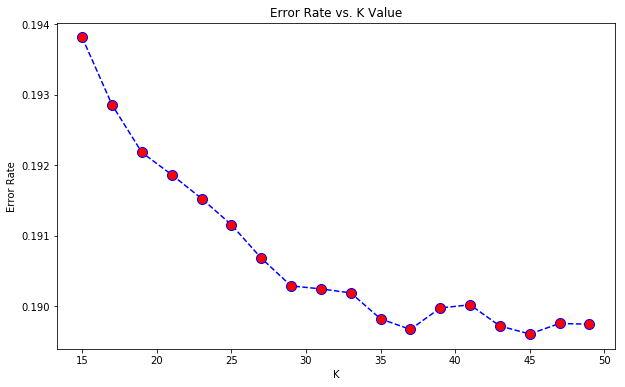

In [199]:
error_rate = []
for i in range(15,50,2):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i, p=2)
    knn.fit(Xtrain,ytrain)
    pred_i = knn.predict(Xtest)
    error_rate.append(np.mean(pred_i != ytest))

plt.figure(figsize=(10,6))
plt.plot(range(15,50,2),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))